In [4]:
#Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.  
#Determine the number of clusters using the elbow method. 
#Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("D:\\Projects\\sales_data_sample.csv", encoding='latin1')

In [19]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [23]:
df.describe

<bound method NDFrame.describe of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  

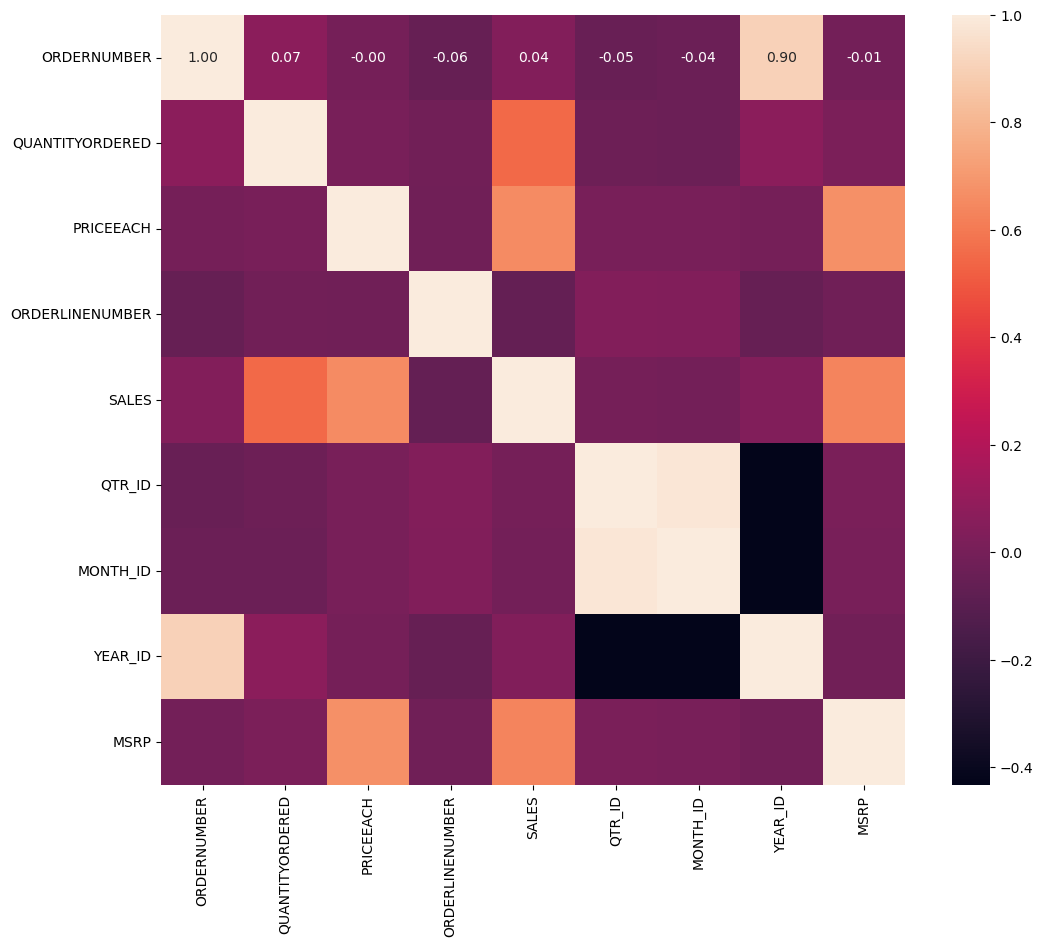

In [25]:
numeric_df = df.select_dtypes(include='number')
fig = plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f')
plt.show()

In [27]:
df= df[['PRICEEACH', 'MSRP']]

In [29]:

df.head()

,PRICEEACH,MSRP
0,95.70,95
1,81.35,95
2,94.74,95
3,83.26,95
4,100.00,95


In [31]:
df.isna().sum()

PRICEEACH    0
MSRP         0
dtype: int64

In [33]:
df.describe

<bound method NDFrame.describe of       PRICEEACH  MSRP
0         95.70    95
1         81.35    95
2         94.74    95
3         83.26    95
4        100.00    95
...         ...   ...
2818     100.00    54
2819     100.00    54
2820     100.00    54
2821      62.24    54
2822      65.52    54

[2823 rows x 2 columns]>

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0


In [37]:
df.shape

(2823, 2)

In [51]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


<Axes: >

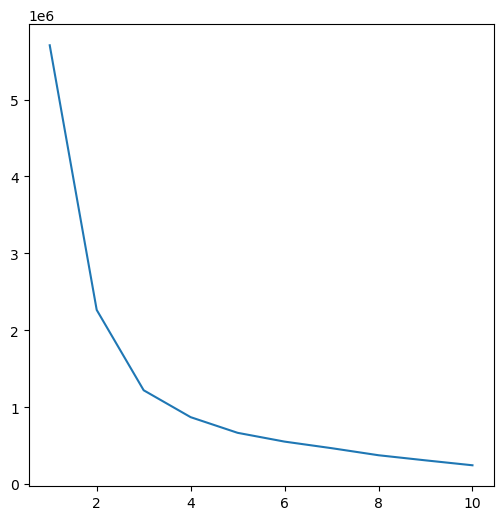

In [53]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1, 11):
    clusters = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusters.fit(df)
    inertia.append(clusters.inertia_)
 
plt.figure(figsize=(6, 6))
sns.lineplot(x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], y = inertia)

In [54]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([2, 2, 2, ..., 0, 0, 0])

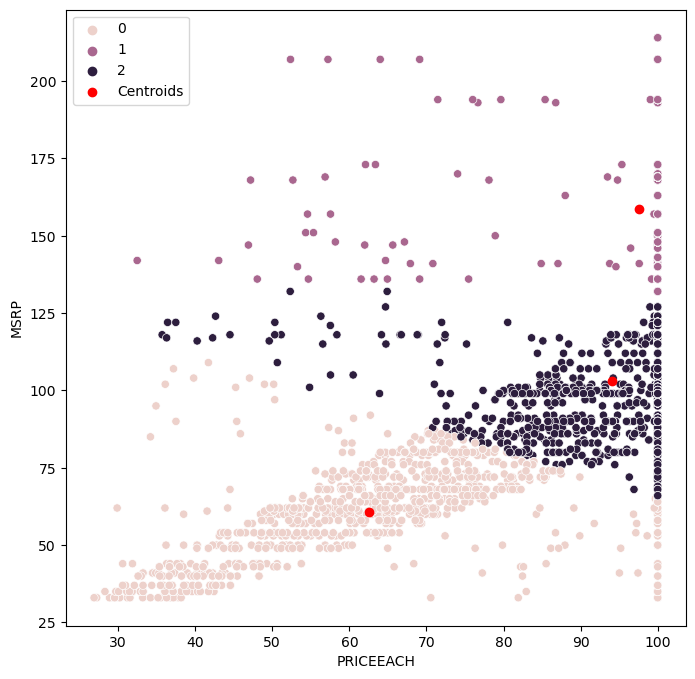

In [55]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['PRICEEACH'], y=df['MSRP'], hue=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'red', label = 'Centroids')
plt.legend()

In [45]:
kmeans.cluster_centers_

array([[ 62.49548902,  60.71556886],
       [ 97.59890263, 158.7202473 ],
       [ 94.03841567, 102.88841567]])